<a href="https://colab.research.google.com/github/ClarisseAlvarenga/data_science_alura_cursos/blob/master/Introdu%C3%A7%C3%A3o_ao_Deeplearning_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEEPLEARNING PARTE 1- INTRODUÇÃO COM KERAS** 

In [25]:
#importando bibliotecas
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model


## **AULA 01 - Conhecendo o conjunto de dados**

In [26]:
#baixando o dataset
dataset = keras.datasets.fashion_mnist
#carregando as tuplas de dados
((imagens_treino,identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()
len(imagens_treino)

60000

In [27]:
#neste caso nós temos 60000 imagens em 28 linhas e 28 colunas de dimensão
imagens_treino.shape

(60000, 28, 28)

In [28]:
#podemos ver que é um array de uma dimensão
identificacoes_treino.shape

(60000,)

Text(0.5, 1.0, '9')

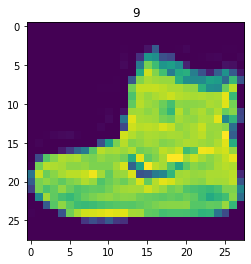

In [29]:
#visualizar uma imagem do dataset
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [30]:
identificacoes_treino.min()

0

In [31]:
identificacoes_treino.max()

9

In [32]:
#criando variáveis para visualização
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta','Calça','Pullover','Vestido','Casaco',
                           'Sandália','Camisa', 'Tênis', 'Bolsa', 'Bota']

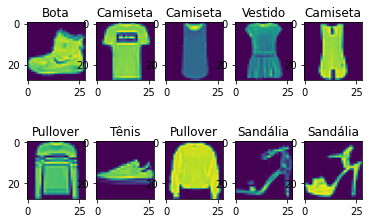

In [33]:
#exibir os dados
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])

  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])


In [34]:
classificacoes = {0 :	'T-shirt/top',1 :	'Trouser', 2 :	'Pullover', 3	: 'Dress', 4	: 'Coat',
        5	: 'Sandal', 6	: 'Shirt', 7	: 'Sneaker', 8	: 'Bag', 9	: 'Ankle boot'}

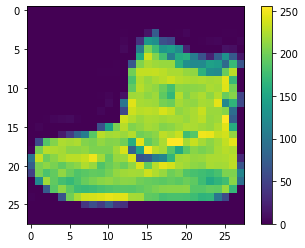

In [35]:
plt.imshow(imagens_treino[0])
plt.colorbar();

## **AULA 02 - Começando a montar o modelo**

### Camada 0

Modelo é uma sequência, com entrada, processamento e saída

In [36]:
modelo = keras.Sequential([
                            keras.layers.Flatten(input_shape=(28,28))
  #processamento
  #saida
])



## **AULA 03 - Adicionando camadas ocultas**

In [37]:
#alterando as imagens de treino para facilitar o uso no modelo, normalizando as imagens 
imagens_treino = imagens_treino/float(255)
#modelo multi-camadas
modelo = keras.Sequential([ keras.layers.Flatten(input_shape=(28,28)), #entrada
                            keras.layers.Dense(256, activation=tensorflow.nn.relu),#processamento
                            keras.layers.Dense(10, activation=tensorflow.nn.softmax)])#saída 

#no Keras é necessário compilar o modelo antes de treiná-lo
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.4861


## **AULA 04 -Ensinando o modelo**

In [38]:
#modelo multi-camadas (aumentando o número de camadas)
modelo = keras.Sequential([ keras.layers.Flatten(input_shape=(28,28)), #entrada
                           #camadas ocultas
                            keras.layers.Dense(256, activation=tensorflow.nn.relu),
                            keras.layers.Dropout(0.2),#processamento
                            #keras.layers.Dense(128, activation=tensorflow.nn.relu), # a adição dessas camadas não melhorou o modelo neste caso
                            #keras.layers.Dense(64, activation=tensorflow.nn.relu),
                            #camada de saída
                            keras.layers.Dense(10, activation=tensorflow.nn.softmax)])#saída 

#no Keras é necessário compilar o modelo antes de treiná-lo
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics= 'accuracy')
#aumentando o número de treinos
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5284 - accuracy: 0.8125 - val_loss: 0.4146 - val_accuracy: 0.8512
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3999 - accuracy: 0.8551 - val_loss: 0.3856 - val_accuracy: 0.8605
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3640 - accuracy: 0.8670 - val_loss: 0.3419 - val_accuracy: 0.8768
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3403 - accuracy: 0.8733 - val_loss: 0.3704 - val_accuracy: 0.8621
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3226 - accuracy: 0.8808 - val_loss: 0.3318 - val_accuracy: 0.8797


In [39]:
#salvando o modelo
modelo.save('modelo.h5')
#carregando o modelo
modelo_salvo = load_model('modelo.h5')

## **AULA 05 - Medindo o Resultado do Modelo**

In [40]:
#testando o modelo
testes = modelo.predict(imagens_teste)

In [41]:
#inspecionando o primeiro item dos testes
testes[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [42]:
#visualizando o maior número e sua posição usando o numpy
print(f'resultado teste: {np.argmax(testes[1])}')
print(f'número da imagem de teste: {identificacoes_teste[2]}')

resultado teste: 2
número da imagem de teste: 1


In [43]:
#criando uma função de avaliação do modelo
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste,identificacoes_teste)
print(f'perda do teste: {perda_teste}')
print(f'acurácia do teste: {acuracia_teste}')

313/313 [==============================] - 1s 2ms/step - loss: 41.8203 - accuracy: 0.8680
perda do teste: 41.82029342651367
acurácia do teste: 0.8679999709129333


In [44]:
imagens_treino.shape

(60000, 28, 28)

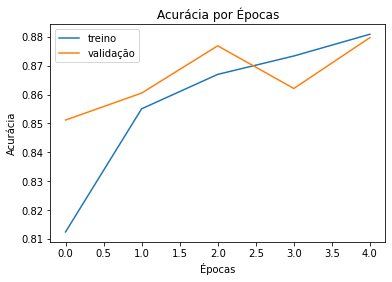

In [45]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino','validação']);

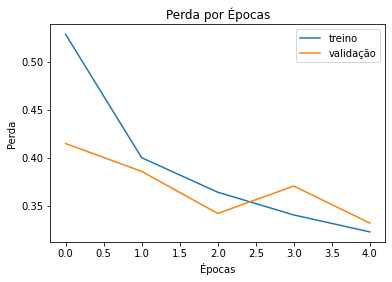

In [46]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['treino','validação']);

In [47]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)

In [48]:
#visualizando o maior número e sua posição usando o numpy
print(f'resultado teste: {np.argmax(testes_modelo_salvo[1])}')
print(f'número da imagem de teste: {identificacoes_teste[1]}')

resultado teste: 2
número da imagem de teste: 2
